In [100]:
import numpy as np
import time
from collections import defaultdict
import sys
import random
import matplotlib.pyplot as plt
import pandas as pd
# Set the seed for reproducibility
np.random.seed(42)

In [2]:
class Heap():
    def __init__(self):
        self.array = []
        self.size = 0
        self.pos = []
 
    def newMinHeapNode(self, v, dist):
        minHeapNode = [v, dist]
        return minHeapNode
 
    # A utility function to swap two nodes
    # of min heap. Needed for min heapify
    def swapMinHeapNode(self, a, b):
        t = self.array[a]
        self.array[a] = self.array[b]
        self.array[b] = t
 
    # A standard function to heapify at given idx
    # This function also updates position of nodes
    # when they are swapped.Position is needed
    # for decreaseKey()
    def minHeapify(self, idx):
        smallest = idx
        left = 2*idx + 1
        right = 2*idx + 2
 
        if (left < self.size and
           self.array[left][1]
            < self.array[smallest][1]):
            smallest = left
 
        if (right < self.size and
           self.array[right][1]
            < self.array[smallest][1]):
            smallest = right
 
        # The nodes to be swapped in min
        # heap if idx is not smallest
        if smallest != idx:
 
            # Swap positions
            self.pos[self.array[smallest][0]] = idx
            self.pos[self.array[idx][0]] = smallest
 
            # Swap nodes
            self.swapMinHeapNode(smallest, idx)
 
            self.minHeapify(smallest)
 
    # Standard function to extract minimum
    # node from heap
    def extractMin(self):
 
        # Return NULL wif heap is empty
        if self.isEmpty() == True:
            return
 
        # Store the root node
        root = self.array[0]
 
        # Replace root node with last node
        lastNode = self.array[self.size - 1]
        self.array[0] = lastNode
 
        # Update position of last node
        self.pos[lastNode[0]] = 0
        self.pos[root[0]] = self.size - 1
 
        # Reduce heap size and heapify root
        self.size -= 1
        self.minHeapify(0)
 
        return root
 
    def isEmpty(self):
        return True if self.size == 0 else False
 
    def decreaseKey(self, v, dist):
 
        # Get the index of v in  heap array
 
        i = self.pos[v]
 
        # Get the node and update its dist value
        self.array[i][1] = dist
 
        # Travel up while the complete tree is
        # not heapified. This is a O(Logn) loop
        while (i > 0 and self.array[i][1] <
                  self.array[(i - 1) // 2][1]):
 
            # Swap this node with its parent
            self.pos[ self.array[i][0] ] = (i-1)//2
            self.pos[ self.array[(i-1)//2][0] ] = i
            self.swapMinHeapNode(i, (i - 1)//2 )
 
            # move to parent index
            i = (i - 1) // 2;
 
    # A utility function to check if a given 
    # vertex 'v' is in min heap or not
    def isInMinHeap(self, v):
 
        if self.pos[v] < self.size:
            return True
        return False

In [3]:
def printArr(dist, n):
    print ("Vertex\tDistance from source")
    for i in range(n):
        print ("%d\t\t%d" % (i,dist[i]))

In [4]:
def dijkstra_list_heap(graph, src):

    V = len(graph)  # Get the number of vertices in graph
    dist = []   # dist values used to pick minimum 
                # weight edge in cut

    # minHeap represents set E
    minHeap = Heap()

    #  Initialize min heap with all vertices. 
    # dist value of all vertices
    for v in range(V):
        dist.append(1e7)
        minHeap.array.append( minHeap.
                            newMinHeapNode(v, dist[v]))
        minHeap.pos.append(v)

    # Make dist value of src vertex as 0 so 
    # that it is extracted first
    minHeap.pos[src] = src
    dist[src] = 0
    minHeap.decreaseKey(src, dist[src])

    # Initially size of min heap is equal to V
    minHeap.size = V;

    # In the following loop, 
    # min heap contains all nodes
    # whose shortest distance is not yet finalized.
    while minHeap.isEmpty() == False:

        # Extract the vertex 
        # with minimum distance value
        newHeapNode = minHeap.extractMin()
        u = newHeapNode[0]

        # Traverse through all adjacent vertices of 
        # u (the extracted vertex) and update their 
        # distance values
        for pCrawl in graph[u]:

            v = pCrawl[0]

            # If shortest distance to v is not finalized 
            # yet, and distance to v through u is less 
            # than its previously calculated distance
            if (minHeap.isInMinHeap(v) and
                 dist[u] != 1e7 and \
               pCrawl[1] + dist[u] < dist[v]):
                    dist[v] = pCrawl[1] + dist[u]

                    # update distance value 
                    # in min heap also
                    minHeap.decreaseKey(v, dist[v])

In [5]:
def generate_adjacency_list(V: int, density: float = 0.5, max_weight: int = 10):
    adj_list = [[] for _ in range(V)]
    
    for i in range(V):
        for j in range(i+1, V):
            if random.random() < density:
                weight = random.randint(1, max_weight)
                adj_list[i].append((j, weight))
                adj_list[j].append((i, weight))  # undirected graph
    
    return adj_list

In [6]:
def generate_adjacency_list(V: int, E: int, max_weight: int = 10):
    if E > V * (V - 1) // 2:
        raise ValueError("Too many edges for the given number of vertices")
    
    adj_list = [[] for _ in range(V)]
    edges_added = 0
    
    while edges_added < E:
        i, j = random.sample(range(V), 2)  # Pick two distinct random vertices
        if not any(neighbor[0] == j for neighbor in adj_list[i]):  # Check if edge doesn't exist
            weight = random.randint(1, max_weight)
            adj_list[i].append((j, weight))
            adj_list[j].append((i, weight))  # undirected graph
            edges_added += 1
    
    return adj_list

In [124]:
# Testing Dijkstra's algorithm and measuring performance
def test_dijkstra(V, density=0.5):
    graph = generate_adjacency_list(V, density)
    start_time = time.time()
    dijkstra_list_heap(graph, 0)
    end_time = time.time()
    return end_time - start_time

# Run empirical tests for different graph sizes
for V in [100, 200, 400, 800]:
    duration = test_dijkstra(V, 1500)
    print(f"Graph size: {V}, Time taken: {duration:.4f} seconds")

Graph size: 100, Time taken: 0.0020 seconds
Graph size: 200, Time taken: 0.0010 seconds
Graph size: 400, Time taken: 0.0050 seconds
Graph size: 800, Time taken: 0.0136 seconds


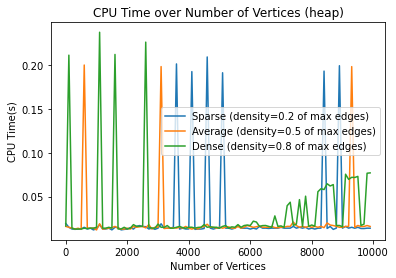

In [264]:
df_v = []
df_2_d = []
df_5_d = []
df_8_d = []
# Run empirical tests for different graph sizes
for V in range(1,10000,100):
    df_v.append(V)
    for E in [0.2*V, 0.5*V, 0.8*V]:
        duration = test_dijkstra(10000, E)
        if E == 0.2*V:
            #print(f"Graph size: {V}, Density: {E}, Time taken: {duration:.4f} seconds")
            df_2_d.append(duration)
        elif E == 0.5*V:
            df_5_d.append(duration)
        else: 
            df_8_d.append(duration)
        #print(f"Graph size: {V}, Density: {E}, Time taken: {duration:.4f} seconds")
df_2 = pd.DataFrame()
df_2['vertices']= df_v
df_2['duration']= df_2_d

df_5 = pd.DataFrame()
df_5['vertices']= df_v
df_5['duration']= df_5_d

df_8 = pd.DataFrame()
df_8['vertices']= df_v
df_8['duration']= df_8_d


# Plot graphs
plt.figure(facecolor='white')
plt.plot(df_2['vertices'],df_2['duration'], label = "Sparse (density=0.2 of max edges)")
plt.plot(df_5['vertices'],df_5['duration'], label = "Average (density=0.5 of max edges)")
plt.plot(df_8['vertices'],df_8['duration'], label = "Dense (density=0.8 of max edges)")
plt.title("CPU Time over Number of Vertices (heap)")
plt.xlabel("Number of Vertices")
plt.ylabel("CPU Time(s)")
plt.legend()

plt.show()

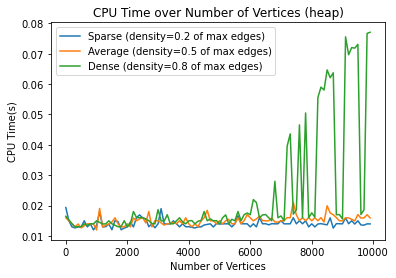

In [266]:
df_2_save2 = df_2
df_5_save5 = df_5
df_8_save8 = df_8

df_2_save2 = df_2_save2.loc[df_2_save2['duration']!=0.0]
df_5_save5 = df_5_save5.loc[df_5_save5['duration']!=0.0]
df_8_save8 = df_8_save8.loc[df_8_save8['duration']!=0.0]

df_2_save2 = df_2_save2.loc[df_2_save2['duration']<=0.10]
df_5_save5 = df_5_save5.loc[df_5_save5['duration']<=0.10]
df_8_save8 = df_8_save8.loc[df_8_save8['duration']<=0.10]


# Plot graphs
plt.figure(facecolor='white')
plt.plot(df_2_save2['vertices'],df_2_save2['duration'], label = "Sparse (density=0.2 of max edges)")
plt.plot(df_5_save5['vertices'],df_5_save5['duration'], label = "Average (density=0.5 of max edges)")
plt.plot(df_8_save8['vertices'],df_8_save8['duration'], label = "Dense (density=0.8 of max edges)")
plt.title("CPU Time over Number of Vertices (heap)")
plt.xlabel("Number of Vertices")
plt.ylabel("CPU Time(s)")
plt.legend()

plt.show()

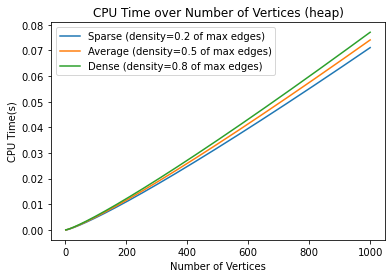

In [260]:
df_v = []
df_2_d = []
df_5_d = []
df_8_d = []
# Run empirical tests for different graph sizes
for V in range(1,10000):
    df_v.append(V)
    for E in [0.2*V, 0.5*V, 0.8*V]:
        if E == 0.2*V:
            #print(f"Graph size: {V}, Density: {E}, Time taken: {duration:.4f} seconds")
            df_2_d.append((E + V*math.log(V))*1e-6)
        elif E == 0.5*V:
            df_5_d.append((E + V*math.log(V))*1e-6)
        else: 
            df_8_d.append((E + V*math.log(V))*1e-6)
        #print(f"Graph size: {V}, Density: {E}, Time taken: {duration:.4f} seconds")
df_2 = pd.DataFrame()
df_2['vertices']= df_v
df_2['duration']= df_2_d

df_5 = pd.DataFrame()
df_5['vertices']= df_v
df_5['duration']= df_5_d

df_8 = pd.DataFrame()
df_8['vertices']= df_v
df_8['duration']= df_8_d

#df_2_d = [i for i in df_2_d if i!=0]
#df_5_d = [i for i in df_5_d if i!=0]
#df_8_d = [i for i in df_8_d if i!=0]


#df_2 = df_2.loc[df_2['duration']!=0.0]
#df_5 = df_5.loc[df_5['duration']!=0.0]
#df_8 = df_8.loc[df_8['duration']!=0.0]


# Plot graphs
plt.figure(facecolor='white')
plt.plot(df_2['vertices'],df_2['duration'], label = "Sparse (density=0.2 of max edges)")
plt.plot(df_5['vertices'],df_5['duration'], label = "Average (density=0.5 of max edges)")
plt.plot(df_8['vertices'],df_8['duration'], label = "Dense (density=0.8 of max edges)")
plt.title("CPU Time over Number of Vertices (heap)")
plt.xlabel("Number of Vertices")
plt.ylabel("CPU Time(s)")
plt.legend()

plt.show()

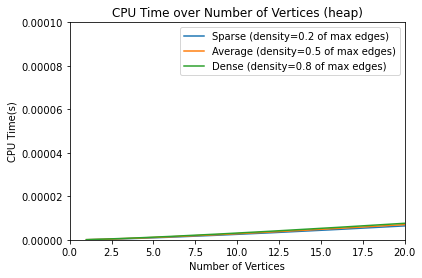

In [249]:
plt.figure(facecolor='white')
plt.plot(df_2['vertices'],df_2['duration'], label = "Sparse (density=0.2 of max edges)")
plt.plot(df_5['vertices'],df_5['duration'], label = "Average (density=0.5 of max edges)")
plt.plot(df_8['vertices'],df_8['duration'], label = "Dense (density=0.8 of max edges)")
plt.title("CPU Time over Number of Vertices (heap)")
plt.xlim(0,20)
plt.ylim(0,0.0001)
plt.xlabel("Number of Vertices")
plt.ylabel("CPU Time(s)")
plt.legend()

plt.show()

In [238]:
df_2.head()

,vertices,duration
0,1,0.200000
1,2,1.786294
2,3,3.895837
3,4,6.345177
4,5,9.047190


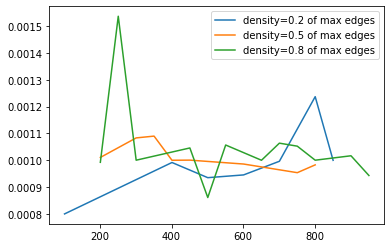

In [216]:
df_2 = pd.DataFrame()
df_2['vertices']= df_v
df_2['duration']= df_2_d

df_5 = pd.DataFrame()
df_5['vertices']= df_v
df_5['duration']= df_5_d

df_8 = pd.DataFrame()
df_8['vertices']= df_v
df_8['duration']= df_8_d

#df_2_d = [i for i in df_2_d if i!=0]
#df_5_d = [i for i in df_5_d if i!=0]
#df_8_d = [i for i in df_8_d if i!=0]


df_2 = df_2.loc[df_2['duration']!=0.0]
df_5 = df_5.loc[df_5['duration']!=0.0]
df_8 = df_8.loc[df_8['duration']!=0.0]


# Plot graphs
plt.plot(df_2['vertices'],df_2['duration'], label = "density=0.2 of max edges")
plt.plot(df_5['vertices'],df_5['duration'], label = "density=0.5 of max edges")
plt.plot(df_8['vertices'],df_8['duration'], label = "density=0.8 of max edges")
plt.legend()
plt.show()

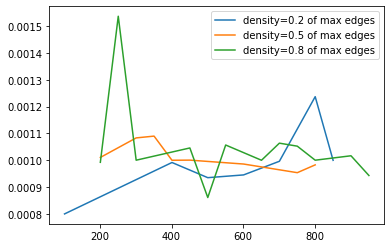

In [217]:

df_2_save = df_2
df_5_save = df_5
df_8_save = df_8
# Plot graphs
plt.plot(df_2_save['vertices'],df_2_save['duration'], label = "density=0.2 of max edges")
plt.plot(df_5_save['vertices'],df_5_save['duration'], label = "density=0.5 of max edges")
plt.plot(df_8_save['vertices'],df_8_save['duration'], label = "density=0.8 of max edges")
plt.legend()
plt.show()